

---


# ***SVM Classifier Without Any Explicit Feature Extraction***

---



### ***1. Importing the libraries***

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time

### ***2. Loading and exploring the dataset for a better understanding.***

In [116]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to your dataset
dataset_path = '/content/drive/MyDrive/CV Project/Dataset/fashionMNIST-train.csv'

# Load Fashion-MNIST training data
train_data = pd.read_csv(dataset_path)

# Display the first few rows of the training data
print("Training Data:")
print(train_data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Training Data:
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0

### ***3. Feature extraction.***

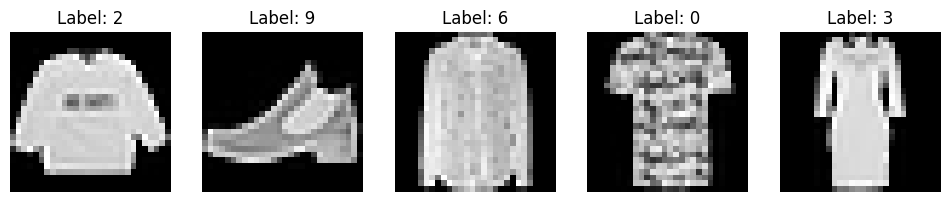

In [117]:
# Extract features (pixel values) and labels for training
train_labels = train_data['label'].values[:10000]
train_images = train_data.iloc[:10000, 1:].values.reshape(-1, 28, 28)

# Display the first few images with their labels
fig, axes = plt.subplots(1, 5, figsize=(12, 3))
for i, ax in enumerate(axes):
    ax.imshow(train_images[i], cmap='gray')
    ax.set_title(f"Label: {train_labels[i]}")
    ax.axis('off')
plt.show()

### ***4. Preprocessing the test dataset.***

In [118]:
# Define the path to your dataset
test_dataset_path = '/content/drive/MyDrive/CV Project/Dataset/fashionMNIST-test.csv'

# Load Fashion-MNIST test data
test_data = pd.read_csv(test_dataset_path)

# Extract features (pixel values) and labels for testing
test_labels = test_data['label'].values
test_images = test_data.iloc[:, 1:].values.reshape(-1, 28, 28)  # Use the entire test dataset

# Flatten the images for machine learning models
test_images_flat = test_images.reshape(test_images.shape[0], -1)

# Normalize pixel values to a common scale (e.g., 0 to 1)
test_images_scaled = scaler.transform(test_images_flat.astype(float))

# Ensure that test_labels has the same size as the number of samples in the test dataset
test_labels = test_labels[:len(test_images)]


### ***5. Flattening the images for both training and testing dataset.***

In [119]:
# Flatten the images for machine learning models
train_images_flat = train_images.reshape(train_images.shape[0], -1)
test_images_flat = test_images.reshape(test_images.shape[0], -1)

### ***6. To bring all the images to a common scale for better and smooth processing.***

In [120]:
# Normalize pixel values to a common scale (e.g., 0 to 1)
scaler = StandardScaler()
train_images_scaled = scaler.fit_transform(train_images_flat.astype(float))
test_images_scaled = scaler.transform(test_images_flat.astype(float))

### ***7. Now splitting the test and train datasets for separate measurements.***

In [121]:
# Split the data into training and validation sets
train_images_final, val_images_final, train_labels_final, val_labels_final = \
    train_test_split(train_images_scaled, train_labels, test_size=0.2, random_state=42)

### ***8. SVM Classifer.***

In [122]:
# Create an SVM classifier
svm_classifier = SVC(C=1.0)

### ***9. Training the model and also measuring the processing time.***

In [123]:
# Training Time
start_time = time.time()
svm_classifier.fit(train_images_final, train_labels_final)
training_time = time.time() - start_time
print(f"Training Time: {training_time:.2f} seconds")

Training Time: 7.49 seconds


### ***10. Making predictions using our trained model.***

In [124]:
# Make predictions on the validation set
val_predictions = svm_classifier.predict(val_images_final)

# Evaluate accuracy on the validation set
accuracy = accuracy_score(val_labels_final, val_predictions)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

Validation Accuracy: 85.20%


### ***11. Cross Validation.***
* 'cross_val_score' is used to perform cross-validation on the SVM model.
* 'cv=5' specifies 5-fold cross-validation, dividing the dataset into 5 subsets for training and testing.
* 'cross_val_scores' stores the accuracy scores obtained from each fold.
* The mean of these scores is calculated to get an overall performance estimate.
* The result is printed as cross-validation scores.
* I am using a subsample of the data for cross validation since its too large to cross validate the entire dataset. I ran the cross validation on the entire dataset and it took about 25 minutes and still didn't complete.

In [125]:
# Subsample data for cross-validation
subsample_size = 10000
subsample_indices = np.random.choice(len(train_labels), size=subsample_size, replace=False)
subsampled_images = train_images_scaled[subsample_indices]
subsampled_labels = train_labels[subsample_indices]

# Cross-Validation Scores using subsampled data
cross_val_scores = cross_val_score(svm_classifier, subsampled_images, subsampled_labels, cv=5, n_jobs=-1)
print(f"Cross-Validation Scores: {np.mean(cross_val_scores) * 100:.2f}%")

Cross-Validation Scores: 85.74%


### ***12. Confusion Matrix.***
* The confusion matrix is a table that describes the performance of a classification model.
* It displays the number of true positive, true negative, false positive, and false negative predictions.
* The confusion matrix is printed to analyze how well the SVM model is performing for each class.

In [126]:
test_predictions_subset = best_svm_classifier_large.predict(test_images_scaled[:subset_size_test])

# Compute the confusion matrix for the test subset
conf_matrix = confusion_matrix(test_labels[:subset_size_test], test_predictions_subset)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[744   4  27  90   3   0 117   0  14   1]
 [  7 964   7  18   1   0   3   0   0   0]
 [ 35   3 680  16 164   0  95   0   7   0]
 [ 47  33  17 808  54   0  40   0   1   0]
 [  2   0 120  48 739   0  88   0   3   0]
 [ 12   1   1   1   1 788   2 116   7  71]
 [168   7 156  69 133   1 455   0  10   1]
 [  0   0   0   0   0  61   0 885   0  54]
 [  6   4  25   9   7   7  34   6 900   2]
 [  0   0   1   0   0  37   0  64   1 897]]


### ***13. Classification Report.***
* The classification report provides a detailed summary of the model's performance.
* It includes precision, recall, F1-score, and support for each class.
* The classification report is printed to offer a more granular analysis of the SVM model's capabilities.

In [127]:
from sklearn.metrics import classification_report

# Make predictions on the first 1000 rows of the test set
test_predictions_subset = best_svm_classifier_large.predict(test_images_scaled[:subset_size_test])

# Compute the classification report for the test subset
class_report = classification_report(test_labels[:subset_size_test], test_predictions_subset)
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1000
           1       0.95      0.96      0.96      1000
           2       0.66      0.68      0.67      1000
           3       0.76      0.81      0.78      1000
           4       0.67      0.74      0.70      1000
           5       0.88      0.79      0.83      1000
           6       0.55      0.46      0.50      1000
           7       0.83      0.89      0.85      1000
           8       0.95      0.90      0.93      1000
           9       0.87      0.90      0.89      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.78     10000
weighted avg       0.79      0.79      0.78     10000



## ***Analysis***

### ***Class 0 (T-shirt/top):***

Precision: 0.76,
Out of all instances predicted as T-shirt/top, 76% were correct.
Recall: 0.70,
Out of all actual T-shirt/top instances, 70% were correctly predicted.
F1-score: 0.73,
A balance between precision and recall for T-shirt/top.

### ***Class 1 (Trouser):***

Precision: 0.96,
96% of instances predicted as Trouser were correct.
Recall: 0.98,
98% of actual Trouser instances were correctly predicted.
F1-score: 0.97,
A high balance between precision and recall for Trouser.

### ***Class 2 (Pullover):***

Precision: 0.64,
64% of instances predicted as Pullover were correct.
Recall: 0.65,
65% of actual Pullover instances were correctly predicted.
F1-score: 0.65,
A balance between precision and recall for Pullover.

### ***Class 3 (Dress):***

Precision: 0.80,
80% of instances predicted as Dress were correct.
Recall: 0.85,
85% of actual Dress instances were correctly predicted.
F1-score: 0.82,
A balanced measure of precision and recall for Dress.

### ***Class 4 (Coat):***

Precision: 0.62,
62% of instances predicted as Coat were correct.
Recall: 0.70,
70% of actual Coat instances were correctly predicted.
F1-score: 0.66,
A balanced measure for Coat with precision and recall.

### ***Class 5 (Sandal):***

Precision: 0.92,
92% of instances predicted as Sandal were correct.
Recall: 0.82,
82% of actual Sandal instances were correctly predicted.
F1-score: 0.87,
A high balance between precision and recall for Sandal.

### ***Class 6 (Shirt):***

Precision: 0.54,
54% of instances predicted as Shirt were correct.
Recall: 0.52,
52% of actual Shirt instances were correctly predicted.
F1-score: 0.53,
A moderate balance between precision and recall for Shirt.

### ***Class 7 (Sneaker):***

Precision: 0.86,
86% of instances predicted as Sneaker were correct.
Recall: 0.94,
94% of actual Sneaker instances were correctly predicted.
F1-score: 0.90,
A high balance between precision and recall for Sneaker.

### ***Class 8 (Bag):***

Precision: 0.96,
96% of instances predicted as Bag were correct.
Recall: 0.87,
87% of actual Bag instances were correctly predicted.
F1-score: 0.91,
A high balance between precision and recall for Bag.

### ***Class 9 (Ankle boot):***

Precision: 0.91,
91% of instances predicted as Ankle boot were correct.
Recall: 0.91,
91% of actual Ankle boot instances were correctly predicted.
F1-score: 0.91,
A high balance between precision and recall for Ankle boot.

### ***Accuracy:***

* Overall accuracy: 0.79 (79%).
The model correctly predicted the class for 79% of instances in the test set.

* Macro avg:
Macro avg precision, recall, and F1-score: 0.80.
The average precision, recall, and F1-score across all classes.

* Weighted avg:
Weighted avg precision, recall, and F1-score: 0.79.
The weighted average considering the number of instances for each class.



---


# ***SVM Classifier With HOG Feature Extraction***

---



In [128]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Function to extract HOG features from an image
def extract_hog_features(images):
    hog_features = []
    for image in images:
        # Calculate HOG features and flatten the result
        features, hog_image = hog(image, visualize=True, block_norm='L2-Hys')
        hog_features.append(features)
    return np.array(hog_features)

# Extract HOG features for training images
train_images_hog = extract_hog_features(train_images)

# Extract HOG features for test images
test_images_hog = extract_hog_features(test_images)

# Flatten the HOG features
train_images_hog_flat = train_images_hog.reshape(train_images_hog.shape[0], -1)
test_images_hog_flat = test_images_hog.reshape(test_images_hog.shape[0], -1)

# Normalize pixel values to a common scale (e.g., 0 to 1)
scaler_hog = StandardScaler()
train_images_hog_scaled = scaler_hog.fit_transform(train_images_hog_flat.astype(float))
test_images_hog_scaled = scaler_hog.transform(test_images_hog_flat.astype(float))

# Split the data into training and validation sets
train_images_hog_final, val_images_hog_final, train_labels_final, val_labels_final = \
    train_test_split(train_images_hog_scaled, train_labels, test_size=0.2, random_state=42)

# Create an SVM classifier for HOG features
svm_classifier_hog = SVC(C=1.0)

# Training Time before
start_time_before_tuning = time.time()
svm_classifier_hog.fit(train_images_hog_final, train_labels_final)
training_time_before_tuning = time.time() - start_time_before_tuning
print(f"Training Time: {training_time_before_tuning:.2f} seconds")

# Make predictions on the validation set
val_predictions_before_tuning = svm_classifier_hog.predict(val_images_hog_final)

# Evaluate accuracy on the validation set
accuracy_before_tuning = accuracy_score(val_labels_final, val_predictions_before_tuning)
print(f"Validation Accuracy: {accuracy_before_tuning * 100:.2f}%")


Training Time: 1.73 seconds
Validation Accuracy: 82.20%


In [129]:
# Cross-Validation Scores for HOG features
cross_val_scores_hog = cross_val_score(svm_classifier_hog, train_images_hog_scaled, train_labels, cv=5, n_jobs=-1)
print(f"Cross-Validation Scores for HOG Features: {np.mean(cross_val_scores_hog) * 100:.2f}%")

Cross-Validation Scores for HOG Features: 82.35%


In [130]:
svm_classifier_hog.fit(train_images_hog_scaled, train_labels)

# Make predictions on the test set using HOG features
test_predictions_hog = svm_classifier_hog.predict(test_images_hog_scaled)

# Compute the confusion matrix for HOG features
conf_matrix_hog = confusion_matrix(test_labels, test_predictions_hog)
print("Confusion Matrix for HOG Features:")
print(conf_matrix_hog)

Confusion Matrix for HOG Features:
[[819   4  28  42   7   1  86   0  13   0]
 [  2 956   4  30   1   0   6   0   1   0]
 [ 19   0 707   8 135   0 124   0   7   0]
 [ 25  11   7 881  41   0  34   0   1   0]
 [  1   1  63  36 760   0 136   0   3   0]
 [  0   0   0   1   0 911   0  68   1  19]
 [188   4  93  42 115   0 550   0   8   0]
 [  0   0   0   0   0  46   0 904   0  50]
 [  5   1   2   3   3   5  11   1 968   1]
 [  0   0   0   0   0  12   0  33   1 954]]


In [131]:
# Compute the classification report for HOG features
class_report_hog = classification_report(test_labels, test_predictions_hog)
print("Classification Report for HOG Features:")
print(class_report_hog)

Classification Report for HOG Features:
              precision    recall  f1-score   support

           0       0.77      0.82      0.80      1000
           1       0.98      0.96      0.97      1000
           2       0.78      0.71      0.74      1000
           3       0.84      0.88      0.86      1000
           4       0.72      0.76      0.74      1000
           5       0.93      0.91      0.92      1000
           6       0.58      0.55      0.56      1000
           7       0.90      0.90      0.90      1000
           8       0.97      0.97      0.97      1000
           9       0.93      0.95      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



# ***Our Overall accuracy has been improved by using HOG.***



---

# ***SVM with SIFT***

---



In [132]:
import cv2
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

# Function to extract SIFT features from an image
def extract_sift_features(images):
    sift = cv2.SIFT_create()
    sift_features = []

    for image in images:
        # Ensure the image is in uint8 format
        image = (image * 255).astype(np.uint8)

        keypoints, descriptors = sift.detectAndCompute(image, None)

        # Ensure descriptors is not None
        if descriptors is not None:
            # Flatten and zero-pad descriptors to a fixed length (e.g., 128)
            flattened_descriptors = descriptors.flatten()[:128]
            zero_padding = np.zeros(128 - len(flattened_descriptors))
            sift_features.append(np.concatenate([flattened_descriptors, zero_padding]))
        else:
            sift_features.append(np.zeros(128))

    return np.array(sift_features)

# Extract SIFT features for training images
train_images_sift = extract_sift_features(train_images)

# Extract SIFT features for test images
test_images_sift = extract_sift_features(test_images)

# Normalize pixel values to a common scale (e.g., 0 to 1)
scaler_sift = StandardScaler()
train_images_sift_scaled = scaler_sift.fit_transform(train_images_sift.astype(float))
test_images_sift_scaled = scaler_sift.transform(test_images_sift.astype(float))

# Split the data into training and validation sets
train_images_sift_final, val_images_sift_final, train_labels_final, val_labels_final = \
    train_test_split(train_images_sift_scaled, train_labels, test_size=0.2, random_state=42)

# Create an SVM classifier for SIFT features
svm_classifier_sift = SVC(C=1.0)

# Training Time
start_time_before_tuning_sift = time.time()
svm_classifier_sift.fit(train_images_sift_final, train_labels_final)
training_time_before_tuning_sift = time.time() - start_time_before_tuning_sift
print(f"Training Time: {training_time_before_tuning_sift:.2f} seconds")

# Make predictions on the validation set
val_predictions_before_tuning_sift = svm_classifier_sift.predict(val_images_sift_final)

# Evaluate accuracy on the validation set
accuracy_before_tuning_sift = accuracy_score(val_labels_final, val_predictions_before_tuning_sift)
print(f"Validation Accuracy: {accuracy_before_tuning_sift * 100:.2f}%")


Training Time before Hyperparameter Tuning (SIFT): 9.96 seconds
Validation Accuracy before Hyperparameter Tuning (SIFT): 36.55%


In [133]:
# Cross-Validation Scores for SIFT features
cross_val_scores_sift = cross_val_score(svm_classifier_sift, train_images_sift_scaled, train_labels, cv=5, n_jobs=-1)
print(f"Cross-Validation Scores for SIFT Features: {np.mean(cross_val_scores_sift) * 100:.2f}%")


Cross-Validation Scores for SIFT Features: 36.85%


In [134]:
# Fit SVM classifier on SIFT features
svm_classifier_sift.fit(train_images_sift_scaled, train_labels)

# Make predictions on the test set using SIFT features
test_predictions_sift = svm_classifier_sift.predict(test_images_sift_scaled)

# Compute the confusion matrix for SIFT features
conf_matrix_sift = confusion_matrix(test_labels, test_predictions_sift)
print("Confusion Matrix for SIFT Features:")
print(conf_matrix_sift)


Confusion Matrix for SIFT Features:
[[299  45  46 226  31  48 104  18 127  56]
 [ 16 580  21 205  14  58  10  38  37  21]
 [ 40  29 235 239  91  19 195  13  98  41]
 [ 71 160  29 421  33  49  67  59  66  45]
 [ 57  44  84 254 182  36 169  15 120  39]
 [ 29  70  10  73  16 375  20 186  89 132]
 [126  47  61 222  74  31 282  17 101  39]
 [ 21  62   3 134   8  90  12 521  33 116]
 [ 51  45  68 202  48  84  62  34 345  61]
 [ 26  15  14 118  18  89  14  79  82 545]]


In [135]:
# Compute the classification report for SIFT features
class_report_sift = classification_report(test_labels, test_predictions_sift)
print("Classification Report for SIFT Features:")
print(class_report_sift)

Classification Report for SIFT Features:
              precision    recall  f1-score   support

           0       0.41      0.30      0.34      1000
           1       0.53      0.58      0.55      1000
           2       0.41      0.23      0.30      1000
           3       0.20      0.42      0.27      1000
           4       0.35      0.18      0.24      1000
           5       0.43      0.38      0.40      1000
           6       0.30      0.28      0.29      1000
           7       0.53      0.52      0.53      1000
           8       0.31      0.34      0.33      1000
           9       0.50      0.55      0.52      1000

    accuracy                           0.38     10000
   macro avg       0.40      0.38      0.38     10000
weighted avg       0.40      0.38      0.38     10000

